In [4]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [5]:
cat4 = cv2.imread('../Downloads/CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

In [8]:
cat4=cv2.cvtColor(cat4 , cv2.COLOR_BGR2RGB)

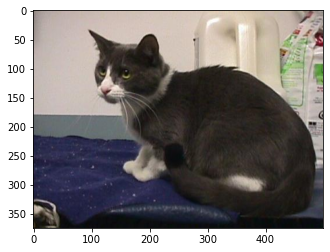

In [9]:
plt.imshow(cat4)

In [14]:
dog2 = cv2.imread('../Downloads/CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')

In [15]:
dog2=cv2.cvtColor(dog2 , cv2.COLOR_BGR2RGB)

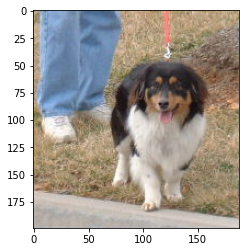

In [16]:
plt.imshow(dog2)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
img = ImageDataGenerator(rotation_range= 30,
                        width_shift_range= 0.1,
                        height_shift_range= 0.1,
                        rescale= 1/255,
                        shear_range= 0.2,
                        zoom_range= 0.2,
                        horizontal_flip= True,
                        fill_mode= 'nearest')

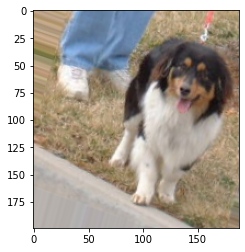

In [18]:
plt.imshow(img.random_transform(dog2))

In [19]:
img.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout

In [22]:
inputs = (150,150,3)

In [37]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (3,3) , input_shape = inputs , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) , input_shape = inputs , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) , input_shape = inputs , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [38]:
batch_size = 16

train_image = img.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/train' ,
                       target_size= inputs[:2],
                       batch_size= batch_size,
                       class_mode = 'binary')

test_image = img.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/test' ,
                       target_size= inputs[:2],
                       batch_size= batch_size,
                       class_mode = 'binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
result = model.fit_generator(train_image , epochs= 1 , steps_per_epoch = 150 , validation_data= test_image , validation_steps= 12)

150/150 [==============================] - 79s 526ms/step - loss: 0.6973 - accuracy: 0.5119 - val_loss: 0.6899 - val_accuracy: 0.5365


In [41]:
model.evaluate(test_image)

391/391 [==============================] - 143s 366ms/step - loss: 0.6905 - accuracy: 0.5002


[0.6904858350753784, 0.5002399682998657]